In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
def model(t, X, param):
    Dc, Mc, Ma, Mn, A, Ca, Da = X
    lambda_ =param["lambda"]
    d0 =param["d0"]
    d1 =param["d1"]
    a1 =param["a1"]
    a2 =param["a2"]
    b2 =param["b2"]
    n2 =param["n2"]
    a3 =param["a3"]
    b3 =param["b3"]
    n3 =param["n3"]
    a4 =param["a4"]
    a5 =param["a5"]
    b5 =param["b5"]
    n5 =param["n5"]
    s = param["cs"]

    k1 = a1;
    k2 = b2*a2**n2/(a2**n2+Da**n2);
    k3 = b3*a3**n3/(a3**n3+Da**n3);
    k4 = a4;
    k5 = a5*Ca**n5/(b5**n5+Ca**n5);

    dDc_dt = lambda_-d0*Dc+0.5*k1*Mc**2-s*Dc
    dMc_dt = -k1*Mc**2-k2*Mc+2*s*Dc
    dMa_dt = k2*Mc-k3*Ma-k4*A*Ma-k5*Ma**2+2*s*Da+s*Ca
    dMn_dt = k3*Ma-d1*Mn
    dA_dt  = -k4*Ma*A+s*Ca
    dCa_dt = k4*Ma*A-s*Ca
    dDa_dt = 0.5*k5*Ma**2-s*Da

    return np.array([dDc_dt, dMc_dt, dMa_dt, dMn_dt, dA_dt, dCa_dt, dDa_dt])

In [24]:
param = {
    "lambda": 15,
    "d0": 0.05,
    "d1": 0.3,
    "a1": 0.01,
    "a2": 400,
    "b2": 0.4,
    "n2": 15,
    "a3": 80,
    "b3": 0.5,
    "n3": 5,
    "a4": 0.05,
    "a5": 0.4,
    "b5": 150,
    "n5": 15,
    "cs": 0.002, 
}

initial_conditions = np.array([300, 0, 0, 0, 200, 0, 0])  # [Dc0, Mc0, Ma0, Mn0, A0, Ca0, Da0]
t_span = (0, 5000) # Temps de 0 a 5000
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # 5000 points 

In [5]:
# Resoudre l ODE
solution = solve_ivp(model, t_span, initial_conditions, t_eval=t_eval, args=(param,), method="RK45")

t = solution.t
Dc, Mc, Ma, Mn, A, Ca, Da = solution.y

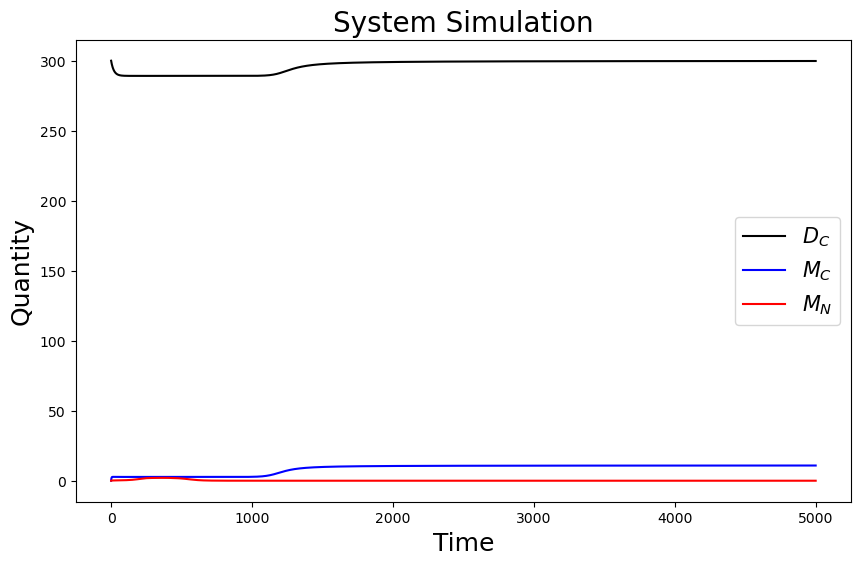

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t, Dc, 'k', label="$D_C$")
plt.plot(t, Mc, 'b', label="$M_C$")
plt.plot(t, Mn, 'r', label="$M_N$")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Quantity", fontsize=18)
plt.title("System Simulation", fontsize=20)
plt.legend(fontsize=15)
plt.show()

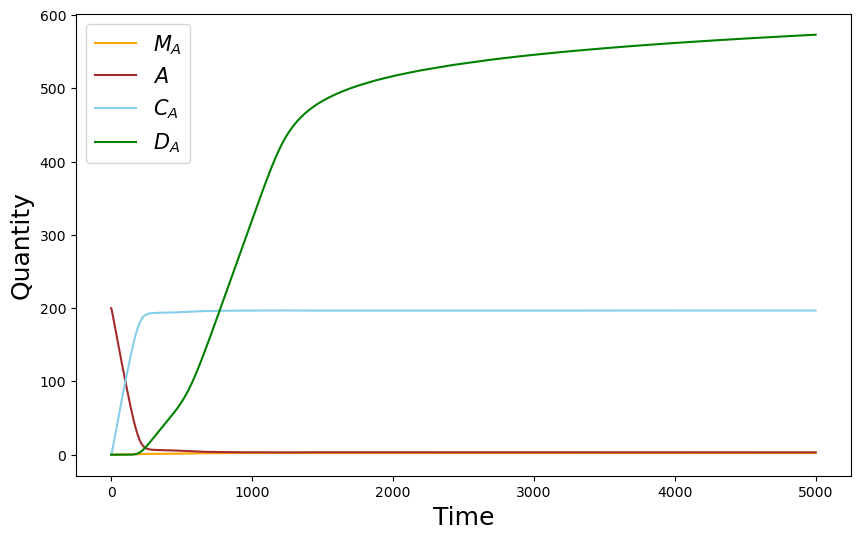

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(t, Ma, 'orange', label="$M_A$")
plt.plot(t, A,  'brown', label="$A$")
plt.plot(t, Ca, 'skyblue', label="$C_A$")
plt.plot(t, Da,  'g', label="$D_A$")
plt.xlabel("Time", fontsize=18)
plt.ylabel("Quantity", fontsize=18)
plt.legend(fontsize=15)
plt.show()